## NLP basics: CountVectorizer and document-term matrix (dtm)

In [1]:
from __future__ import print_function
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# example text for model training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [3]:
vect = CountVectorizer()
vect.fit(simple_train)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
vect.get_feature_names()

[u'cab', u'call', u'me', u'please', u'tonight', u'you']

In [5]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<type 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [6]:
# print the sparse matrix
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [7]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [8]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [9]:
# example text for model testing
simple_test = ["please don't call me"]
simple_test_dtm = vect.transform(simple_test)
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


## Summary:

vect.fit(train) learns the vocabulary of the training data

vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data

vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

## SMS classification (Ham or Spam)

In [10]:
# read file into Pandas from a URL
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv'
sms = pd.read_table(url, header=None, names=['label', 'message'])

In [11]:
sms.shape

(5572, 2)

In [12]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
# required way to define X and y for use with COUNTVECTORIZER
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)

(5572L,)
(5572L,)


In [16]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4179L,)
(1393L,)


In [17]:
# instantiate the vectorizer
vect = CountVectorizer()

# combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

# examine the document-term matrix
X_train_dtm

<4179x7456 sparse matrix of type '<type 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [18]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names()).head()

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<type 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [20]:
pd.DataFrame(X_test_dtm.toarray(), columns=vect.get_feature_names()).head()

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building a Naive Bayes model:
We will use multinomial Naive Bayes: The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [21]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [22]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 2 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [24]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.98851399856424982

In [25]:
# print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1203    5]
 [  11  174]]


In [26]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1208
          1       0.97      0.94      0.96       185

avg / total       0.99      0.99      0.99      1393



In [27]:
# print message text for the false positives (meaning they were incorrectly classified as spam)
X_test[y_test < y_pred_class]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [28]:
# print message text for the false negatives (meaning they were incorrectly classified as ham)
X_test[y_test > y_pred_class]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [29]:
# check an example of false negatives
X_test[3132]

"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."

In [30]:
# calculate predicted probabilities for X_test_dtm CLASS 1 which is SPAM (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([  2.87744864e-03,   1.83488846e-05,   2.07301295e-03, ...,
         1.09026171e-06,   1.00000000e+00,   3.98279868e-09])

In [31]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.98664310005369615

In [32]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

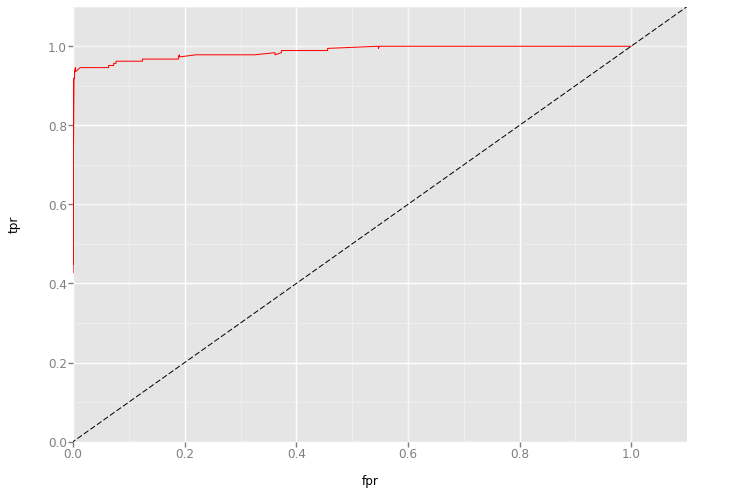

<ggplot: (11589226)>

In [33]:
# Plot ROC curve
from ggplot import *
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) + \
        geom_line(color='red') + \
        geom_abline(linetype='dashed') + \
        scale_y_continuous(limits=(0,1.1)) + \
        scale_x_continuous(limits=(0,1.1))

## Comparing Naive Bayes with logistic regression

In [34]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [35]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 36 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [37]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [38]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([ 0.01269556,  0.00347183,  0.00616517, ...,  0.03354907,
        0.99725053,  0.00157706])

In [39]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.99368176123143015

In [40]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

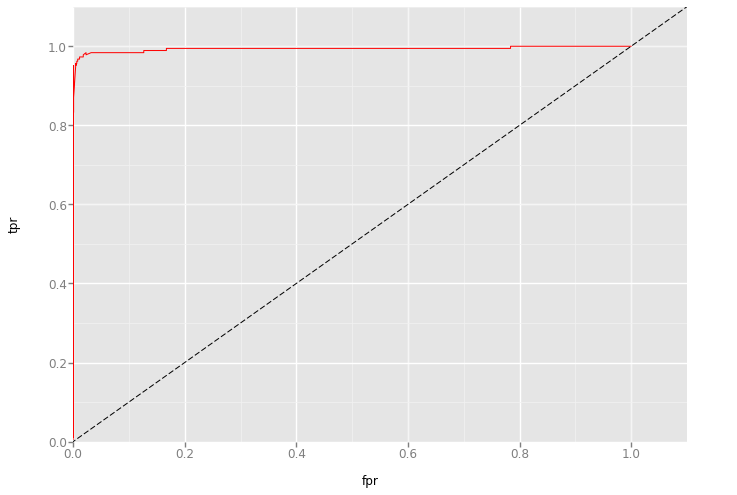

<ggplot: (11589212)>

In [41]:
# Plot ROC curve
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) + \
        geom_line(color='red') + \
        geom_abline(linetype='dashed') + \
        scale_y_continuous(limits=(0,1.1)) + \
        scale_x_continuous(limits=(0,1.1))

## Calculating the "spamminess" of each token

In [42]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

7456

In [43]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

# examine the last 50 tokens
print(X_train_tokens[-50:])

[u'00', u'000', u'008704050406', u'0121', u'01223585236', u'01223585334', u'0125698789', u'02', u'0207', u'02072069400', u'02073162414', u'02085076972', u'021', u'03', u'04', u'0430', u'05', u'050703', u'0578', u'06', u'07', u'07008009200', u'07090201529', u'07090298926', u'07123456789', u'07732584351', u'07734396839', u'07742676969', u'0776xxxxxxx', u'07781482378', u'07786200117', u'078', u'07801543489', u'07808', u'07808247860', u'07808726822', u'07815296484', u'07821230901', u'07880867867', u'0789xxxxxxx', u'07946746291', u'0796xxxxxx', u'07973788240', u'07xxxxxxxxx', u'08', u'0800', u'08000407165', u'08000776320', u'08000839402', u'08000930705']
[u'yer', u'yes', u'yest', u'yesterday', u'yet', u'yetunde', u'yijue', u'ym', u'ymca', u'yo', u'yoga', u'yogasana', u'yor', u'yorge', u'you', u'youdoing', u'youi', u'youphone', u'your', u'youre', u'yourjob', u'yours', u'yourself', u'youwanna', u'yowifes', u'yoyyooo', u'yr', u'yrs', u'ything', u'yummmm', u'yummy', u'yun', u'yunny', u'yuo', u'

In [44]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[  0.,   0.,   0., ...,   1.,   1.,   1.],
       [  5.,  23.,   2., ...,   0.,   0.,   0.]])

In [45]:
# rows represent classes, columns represent tokens
nb.feature_count_.shape

(2L, 7456L)

In [46]:
# number of times each token appears across all HAM messages
ham_token_count = nb.feature_count_[0, :]
ham_token_count

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

In [47]:
# number of times each token appears across all SPAM messages
spam_token_count = nb.feature_count_[1, :]
spam_token_count

array([  5.,  23.,   2., ...,   0.,   0.,   0.])

In [48]:
# create a DataFrame of tokens with their separate ham and spam counts
tokens = pd.DataFrame({'token':X_train_tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('token')

# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

,ham,spam
token,,
very,64.0,2.0
nasty,1.0,1.0
villa,0.0,1.0
beloved,1.0,0.0
textoperator,0.0,2.0


In [49]:
# add 1 to ham and spam counts to avoid dividing by 0
tokens['ham'] = tokens.ham + 1
tokens['spam'] = tokens.spam + 1
tokens.sample(5, random_state=6)

,ham,spam
token,,
very,65.0,3.0
nasty,2.0,2.0
villa,1.0,2.0
beloved,2.0,1.0
textoperator,1.0,3.0


In [50]:
# Naive Bayes counts the number of observations in each class (total observations=4179)
nb.class_count_

array([ 3617.,   562.])

In [51]:
# convert the ham and spam counts into frequencies
tokens['ham'] = tokens.ham / nb.class_count_[0]
tokens['spam'] = tokens.spam / nb.class_count_[1]
tokens.sample(5, random_state=6)

,ham,spam
token,,
very,0.017971,0.005338
nasty,0.000553,0.003559
villa,0.000276,0.003559
beloved,0.000553,0.001779
textoperator,0.000276,0.005338


In [52]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam / tokens.ham
tokens.sample(5, random_state=6)

,ham,spam,spam_ratio
token,,,
very,0.017971,0.005338,0.297044
nasty,0.000553,0.003559,6.435943
villa,0.000276,0.003559,12.871886
beloved,0.000553,0.001779,3.217972
textoperator,0.000276,0.005338,19.307829


In [53]:
# examine the DataFrame sorted by spam_ratio
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
tokens.sort_values('spam_ratio', ascending=False).iloc[0:10]

,ham,spam,spam_ratio
token,,,
claim,0.000276,0.158363,572.798932
prize,0.000276,0.135231,489.131673
150p,0.000276,0.087189,315.361210
tone,0.000276,0.085409,308.925267
guaranteed,0.000276,0.076512,276.745552
18,0.000276,0.069395,251.001779
cs,0.000276,0.065836,238.129893
www,0.000553,0.129893,234.911922
1000,0.000276,0.056940,205.950178


In [54]:
# look up the spam_ratio for a given token
tokens.loc['dating', 'spam_ratio']

83.667259786476862